In [1]:
from Dissects.skel import Skel
from Dissects.utils import clean_skeleton

import os
from skimage import io
import numpy as np
import pandas as pd
import copy
import sys
import matplotlib.pyplot as plt
sys.setrecursionlimit(10000)




In [2]:
# directory='/home/admin-suz/Documents/testCellSeg/TestSPIM/'
# # import image
# skeleton = Skel(os.path.join(directory,'C1-20191112_SQHrfp-EcadGFP_DLG647_180degre_04-1.fits_c100.up.NDskl.a.NDskl'))

directory='/home/admin-suz/Documents/testCellSeg/Test1/'
skeleton = Skel(os.path.join(directory,'im_bin4_3d.fits_c1e+03.up.NDskl.a.NDskl'))

if skeleton.isValid():
    skeleton.write_vtp(os.path.join(directory, "image_original.vtp"))
else:
    raise nameError('skeleton not valid')   
    
# lecture de l'image tif, pour récupérer le ratio depth/xy pixel

reading: 3763 critical points
reading: 3648 filaments
reading: critical points data
critical points done
reading: filaments data
Writing skeleton vtp file /home/admin-suz/Documents/testCellSeg/Test1/image_original.vtp 



In [3]:
clean_skeleton(skeleton)

Writing skeleton vtp file /home/admin-suz/Documents/testCellSeg/Test1/im_bin4_3d.fits_c1e+03.up.NDskl.a.NDskl/_removefil.vtp 



In [4]:
data_crit = []

for c in skeleton.crit:
    data_crit.append(
        {
            "id":c,
            "x": c.pos[0],
            "y": c.pos[1],
            "z": c.pos[2] * 0.22/0.18,
            "n_fil": c.nfil,
            "val": int(c.val),
            "pair": c.pair,
            "type":int(c.typ),
            "destCritId_addr":c.destCritId,
            "filId":c.filId,
        }
    )

data_crit = pd.DataFrame.from_records(data_crit)
tmp_id = []
for ci in data_crit['destCritId_addr'].values:
    tmp=[]
    for c in ci:
        tmp.append(data_crit[data_crit['id']==c].index.to_numpy()[0])
        
    tmp_id.append(tmp)

data_crit['destCritId'] = tmp_id
data_crit.head()

,id,x,y,z,n_fil,val,pair,type,destCritId_addr,filId,destCritId
0,<Dissects.skel.CriticalPoint object at 0x7fe10...,312.0,46.0,11.0,2,4184,<Dissects.skel.CriticalPoint object at 0x7fe0b...,3,[<Dissects.skel.CriticalPoint object at 0x7fe0...,[<Dissects.skel.Filament object at 0x7fe0bf570...,"[906, 922]"
1,<Dissects.skel.CriticalPoint object at 0x7fe0b...,307.0,47.0,11.0,2,3441,<Dissects.skel.CriticalPoint object at 0x7fe0b...,3,[<Dissects.skel.CriticalPoint object at 0x7fe0...,[<Dissects.skel.Filament object at 0x7fe0bf570...,"[907, 922]"
2,<Dissects.skel.CriticalPoint object at 0x7fe10...,336.0,49.0,11.0,2,10609,<Dissects.skel.CriticalPoint object at 0x7fe0b...,3,[<Dissects.skel.CriticalPoint object at 0x7fe0...,[<Dissects.skel.Filament object at 0x7fe0bf570...,"[908, 909]"
3,<Dissects.skel.CriticalPoint object at 0x7fe0b...,261.0,140.0,11.0,3,10965,<Dissects.skel.CriticalPoint object at 0x7fe0b...,3,[<Dissects.skel.CriticalPoint object at 0x7fe0...,[<Dissects.skel.Filament object at 0x7fe0bf579...,"[914, 915, 949]"
4,<Dissects.skel.CriticalPoint object at 0x7fe0b...,259.0,142.0,11.0,2,9023,<Dissects.skel.CriticalPoint object at 0x7fe0b...,3,[<Dissects.skel.CriticalPoint object at 0x7fe0...,[<Dissects.skel.Filament object at 0x7fe0bf579...,"[915, 950]"


In [5]:
data_fil = []

for f in skeleton.fil:
    data_fil.append(
        {
            "id":f,
            "cp1_add": f.cp1,
            "cp2_add": f.cp2,
            "cp1": data_crit[data_crit['id']==f.cp1].index.to_numpy()[0],
            "cp2": data_crit[data_crit['id']==f.cp2].index.to_numpy()[0],
            "points": f.points
            
        }
    )

data_fil = pd.DataFrame.from_records(data_fil)
data_fil.head()

,id,cp1_add,cp2_add,cp1,cp2,points
0,<Dissects.skel.Filament object at 0x7fe0bf570d10>,<Dissects.skel.CriticalPoint object at 0x7fe0b...,<Dissects.skel.CriticalPoint object at 0x7fe0b...,905,5,"[[254.0, 152.5, 8.0], [254.0, 151.5, 8.0], [25..."
1,<Dissects.skel.Filament object at 0x7fe0bf570b10>,<Dissects.skel.CriticalPoint object at 0x7fe0b...,<Dissects.skel.CriticalPoint object at 0x7fe0b...,905,6,"[[254.0, 152.5, 8.0], [254.0, 153.5, 8.5], [25..."
2,<Dissects.skel.Filament object at 0x7fe0bf570c90>,<Dissects.skel.CriticalPoint object at 0x7fe0b...,<Dissects.skel.CriticalPoint object at 0x7fe0b...,906,11,"[[315.5, 47.0, 9.0], [316.5, 47.0, 9.0], [317...."
3,<Dissects.skel.Filament object at 0x7fe0bf570d50>,<Dissects.skel.CriticalPoint object at 0x7fe0b...,<Dissects.skel.CriticalPoint object at 0x7fe10...,906,0,"[[315.5, 47.0, 9.0], [314.5, 46.5, 9.0], [313...."
4,<Dissects.skel.Filament object at 0x7fe0bf570e10>,<Dissects.skel.CriticalPoint object at 0x7fe0b...,<Dissects.skel.CriticalPoint object at 0x7fe0b...,907,1,"[[301.5, 49.0, 9.0], [302.5, 49.0, 9.0], [303...."


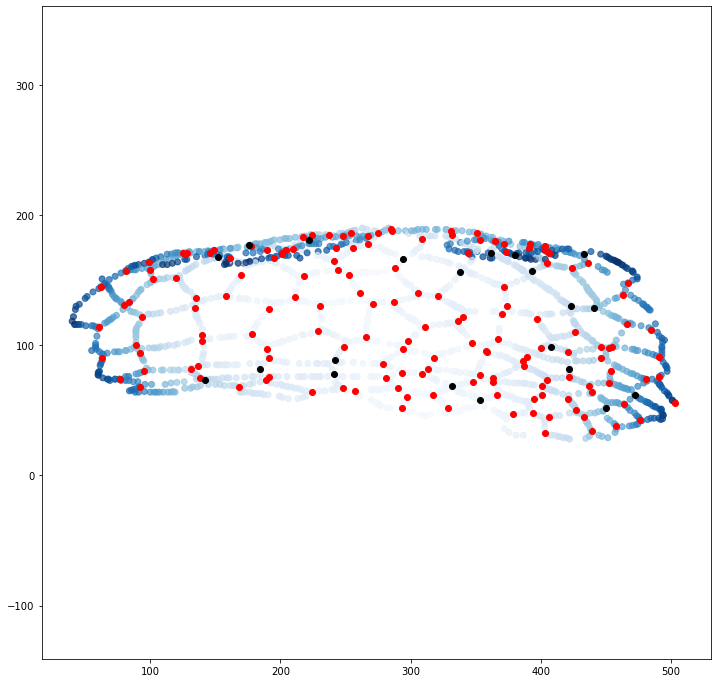

In [6]:
fig, ax = plt.subplots()

ax.scatter(data_crit.x, data_crit.y, c=data_crit.z, cmap='Blues', alpha=0.7)

#ax.scatter(data_crit.loc[[0,3]]['x'], data_crit.loc[[0,3]]['y'], color='red')

data_crit_2 = data_crit[data_crit.n_fil==3]
ax.scatter(x=data_crit_2['x'],
            y=data_crit_2['y'],
           color= 'red')

data_crit_2 = data_crit[data_crit.n_fil>3]
ax.scatter(x=data_crit_2['x'],
            y=data_crit_2['y'],
           color= 'black')

ax.axis('equal')

# ax.set_xlim(300, 400)
# ax.set_ylim(50, 100)
fig.set_size_inches(12, 12)


In [7]:
import ipyvolume as ipv
from matplotlib import cm
data=data_crit.copy()
cmap = cm.get_cmap("viridis")
colors = cmap((data.z-data.z.min())/(data.z.max()-data.z.min()))

ipv.clear()
ipv.scatter(x=np.array(data.x)*10, y=np.array(data.y)*10, z=data.z*10, size=1, color=colors, marker='circle_2d')
ipv.squarelim()
ipv.show()

In [300]:
from itertools import chain

x=[]
y=[]
z=[]
for fp in data_fil.points:
    x.append(list(fp.flatten()[0::3]))
    y.append(list(fp.flatten()[1::3]))
    z.append(list(fp.flatten()[2::3]))
x = list(chain.from_iterable(x))
y = list(chain.from_iterable(y))
z = list(chain.from_iterable(z))

x = list(map(int, x))
y = list(map(int, y))
z = list(map(int, z))


import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=x,
                                  y=y,
                                  z=z,
                                  mode='markers',
                                 marker=dict(
                                    size=1,
                                    color=z,                # set color to an array/list of desired values
                                    colorscale='Viridis',   # choose a colorscale
                                    opacity=0.8
                                 )
    )])

fig.update_layout(title='Filament', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))

fig['layout'].update(scene=dict(aspectmode="data"))

fig.show()

In [293]:
img0 = io.imread(os.path.join(directory, "image.tif"))
img_output = img0.copy()
img_output = np.where(img_output>0, 0, img_output) 
w = 0
for f in skeleton.fil:
    for p in f.points: 
        if w != 0:
            for z in range(int(p[2])-w,int(p[2])+w):
                for y in range(int(p[1])-w,int(p[1])+w):
                    for x in range(int(p[0])-w,int(p[0])+w):
                        try:
                            img_output[z][y][x]=65000
                        except:
                            pass
        else : 
            x=int(p[0])
            y=int(p[1])
            z=int(p[2])
            img_output[z][y][x]=65000
#io.imsave('binary_images.tif', img_output)

In [294]:
img0.shape

(86, 201, 525)

In [491]:
first_color_pixel = {"x":236, "y":157, "z":11}

#Cadre around the cell
left_top_corner = first_color_pixel
right_bottom_corner = first_color_pixel

cell = {'x':[], 
        'y':[],
        'z':[]}
cell['x'].append(first_color_pixel['x'])
cell['y'].append(first_color_pixel['y'])
cell['z'].append(first_color_pixel['z'])


def activated_pixel(images, center_pos, width=1):
    """
    Cherche les pixels appartenant au masque autour d'un pixel 'center_pos', 
    à une distance d'un pixel
    return toutes les positions des pixel faisant partie du masque
    """
    
    list_activated_pixel={'x':[], 
                        'y':[],
                        'z':[]}
    
    for x in range (center_pos['x']-width, center_pos['x']+width+1):
        for y in range (center_pos['y']-width, center_pos['y']+width+1):
            for z in range (center_pos['z']-width, center_pos['z']+width+1):
                if images[z][y][x]==65000 :
                    if not((x==center_pos['x']) and (y==center_pos['y']) and (z==center_pos['z'])):
                        list_activated_pixel['x'].append(x)
                        list_activated_pixel['y'].append(y)
                        list_activated_pixel['z'].append(z)

    return list_activated_pixel




    
    
    
    

In [492]:
res = activated_pixel(img_output, first_color_pixel)
cell['x'].append(res['x'][0])
cell['y'].append(res['y'][0])
cell['z'].append(res['z'][0])

for cpt in range(55):
    res = activated_pixel(img_output, {'x':cell['x'][-1], 'y':cell['y'][-1], 'z':cell['z'][-1]})

    # remove the pixel which is arleady taged
    for pos_cell in range(len(cell['x'])):
        pos = 0
        while pos < len(res['x']):
            if ((cell['x'][pos_cell] == res['x'][pos]) and
                (cell['y'][pos_cell] == res['y'][pos]) and
                (cell['z'][pos_cell] == res['z'][pos])):

                del res['x'][pos]
                del res['y'][pos]
                del res['z'][pos]
    
            else:
                pos +=1
    
    # si le cadre de 1 ne suffit pas, prendre un cadre de 2 autours du pixel de travail 
    if len(res['x'])==0:
        res = activated_pixel(img_output, {'x':cell['x'][-1], 'y':cell['y'][-1], 'z':cell['z'][-1]}, width=2)
        # remove the pixel which is arleady taged
        for pos_cell in range(len(cell['x'])):
            pos = 0
            while pos < len(res['x']):
                if ((cell['x'][pos_cell] == res['x'][pos]) and
                    (cell['y'][pos_cell] == res['y'][pos]) and
                    (cell['z'][pos_cell] == res['z'][pos])):

                    del res['x'][pos]
                    del res['y'][pos]
                    del res['z'][pos]

                else:
                    pos +=1
    
    
    if len(res['x'])>=2 :           
        # minimal box that contains set of points
        left_top_corner = {'x':min(cell['x']), 
                           'y':min(cell['y']), 
                           'z':min(cell['z'])}
        right_bottom_corner = {'x':max(cell['x']), 
                               'y':max(cell['y']), 
                               'z':max(cell['z'])}
        nb_extention=[]
        for pos in range(len(res['x'])):
            tpm_cpt = 0
            if (res['x'][pos]>right_bottom_corner['x']) or (res['x'][pos]<left_top_corner['x']):
                tpm_cpt +=1
            if (res['y'][pos]>right_bottom_corner['y']) or (res['y'][pos]<left_top_corner['y']):
                tpm_cpt+=1
            if (res['z'][pos]>right_bottom_corner['z']) or (res['z'][pos]<left_top_corner['z']):
                tpm_cpt+=1
                
            nb_extention.append(tpm_cpt)
            
        # choose the correct pixel
        cell['x'].append(res['x'][np.argmin(nb_extention)])
        cell['y'].append(res['y'][np.argmin(nb_extention)])
        cell['z'].append(res['z'][np.argmin(nb_extention)])
            
    else : 
        cell['x'].append(res['x'][0])
        cell['y'].append(res['y'][0])
        cell['z'].append(res['z'][0])
 

In [485]:
left_top_corner, right_bottom_corner

({'x': 195, 'y': 152, 'z': 10}, {'x': 236, 'y': 166, 'z': 17})

In [486]:
res

{'x': [194, 195, 196], 'y': [166, 167, 167], 'z': [17, 17, 17]}

In [484]:
nb_extention

[1, 1, 1]

In [487]:
pd.DataFrame.from_dict(cell)

,x,y,z
0,236,157,11
1,235,157,11
2,234,157,10
3,233,157,10
4,232,156,11
5,231,156,11
6,230,156,11
7,229,156,11
8,228,156,11
9,227,156,11


In [493]:

trace1=go.Scatter3d(x=x,
                  y=y,
                  z=z,
                  mode='markers',
                 marker=dict(
                    size=1,
                    color='black',                # set color to an array/list of desired values
                    colorscale='Viridis',   # choose a colorscale
                    opacity=0.8
                 )
)




trace2=go.Scatter3d(x=cell['x']*10,
                  y=cell['y']*10,
                  z=cell['z']*10,
                  mode='markers',
                 marker=dict(
                    size=2,
                    color='red',                # set color to an array/list of desired values
                    opacity=0.2
                 )
)

data=[trace2, trace1]

fig = go.Figure(data=data)

fig.update_layout(title='Filament', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))

fig['layout'].update(scene=dict(aspectmode="data"))
fig.show()

In [ ]:

x_=cell['x'][-1]
y_=cell['y'][-1]
z_=cell['z'][-1]
if (img_output[z_][y_][x_+1] == 65000) :
    print('ok0')
    cell['x'].append(x_+1)
    cell['y'].append(y_)
    cell['z'].append(z_)
elif (img_output[z_][y_][x_-1] == 65000) :
    print('ok1')
    cell['x'].append(x_-1)
    cell['y'].append(y_)
    cell['z'].append(z_)
elif (img_output[z_][y_+1][x_] == 65000) :
    print('ok2')
    cell['x'].append(x_)
    cell['y'].append(y_+1)
    cell['z'].append(z_)
elif (img_output[z_][y_-1][x_] == 65000) :
    print('ok3')
    cell['x'].append(x_)
    cell['y'].append(y_-1)
    cell['z'].append(z_)
elif (img_output[z_+1][y_][x_] == 65000) :
    print('ok4')
    cell['x'].append(x_)
    cell['y'].append(y_)
    cell['z'].append(z_+1)
elif (img_output[z_-1][y_][x_] == 65000) :
    print('ok5')
    cell['x'].append(x_)
    cell['y'].append(y_)
    cell['z'].append(z_-1)
else:
    print('oups')
cell
cpt = 0
while cpt<10:
    x_=cell['x'][-1]
    y_=cell['y'][-1]
    z_=cell['z'][-1]
    
    
    cpt+=1